<a href="https://colab.research.google.com/github/fwkhan/CE888/blob/main/lab7/Copy_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 36s 5ms/step - loss: 0.4312 - accuracy: 0.8607 - val_loss: 0.0684 - val_accuracy: 0.9797
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.0458 - val_accuracy: 0.9868
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0349 - accuracy: 0.9895 - val_loss: 0.0434 - val_accuracy: 0.9870
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0436 - val_accuracy: 0.9884
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0390 - val_accuracy: 0.9898


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9907


0.9907000064849854

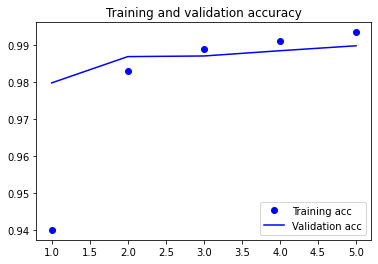

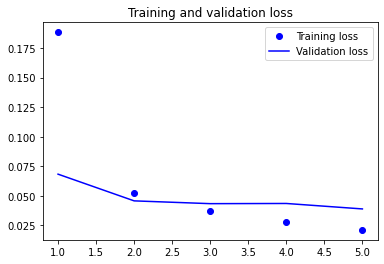

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [9]:
# Write code here
def CNN(optimizer, activation):  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation=activation))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  # model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

  return model


In [10]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=CNN, epochs=5, batch_size=64, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adam', 'Adamax', 'Nadam']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'softsign']
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(optimizer=optimizer, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_images, train_labels, validation_split=0.2)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.987700 using {'activation': 'relu', 'optimizer': 'RMSprop'}
0.112367 (0.002416) with: {'activation': 'softmax', 'optimizer': 'SGD'}
0.635433 (0.115522) with: {'activation': 'softmax', 'optimizer': 'RMSprop'}
0.712417 (0.089380) with: {'activation': 'softmax', 'optimizer': 'Adam'}
0.153483 (0.055732) with: {'activation': 'softmax', 'optimizer': 'Adamax'}
0.633800 (0.055592) with: {'activation': 'softmax', 'optimizer': 'Nadam'}
0.959033 (0.003631) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.987700 (0.002101) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.984283 (0.000638) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.980583 (0.000721) with: {'activation': 'relu', 'optimizer': 'Adamax'}
0.986133 (0.000866) with: {'activation': 'relu', 'optimizer': 'Nadam'}
0.948917 (0.001036) with: {'activation': 'tanh', 'optimizer': 'SGD'}
0.985817 (0.000225) with: {'activation': 'tanh', 'optimizer': 'RMSprop'}
0.985750 (0.000141) with: {'activation': 'tanh', 'optimizer': 'Ad

In [19]:
def create_model():  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
  # model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

  return model

In [20]:
# define the grid search batch_size
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [5]
model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = dict(epochs=epochs,batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, cv=3)
grid_result = grid.fit(train_images, train_labels, validation_split=0.2)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.987967 using {'batch_size': 20, 'epochs': 5}
0.984417 (0.002676) with: {'batch_size': 10, 'epochs': 5}
0.987967 (0.000452) with: {'batch_size': 20, 'epochs': 5}
0.986717 (0.001065) with: {'batch_size': 40, 'epochs': 5}
0.987350 (0.000965) with: {'batch_size': 60, 'epochs': 5}
0.985800 (0.001824) with: {'batch_size': 80, 'epochs': 5}
0.986600 (0.001042) with: {'batch_size': 100, 'epochs': 5}


In [ ]:
# define the grid search epochs
epochs = [10, 20, 40, 60, 80, 100]
batch_size = [20]
model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = dict(epochs=epochs,batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, cv=3)
grid_result = grid.fit(train_images, train_labels, validation_split=0.2)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Final Model with Parameters from Grid Search


*   Activation = 'relu'
*   Optimizer = 'RMSprop'
*   Batch_size = 20
*   Epochs = 20


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=10, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc


Epoch 1/10
4800/4800 [==============================] - 17s 3ms/step - loss: 0.2809 - accuracy: 0.9195 - val_loss: 0.0693 - val_accuracy: 0.9791
Epoch 2/10
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0560 - accuracy: 0.9830 - val_loss: 0.0552 - val_accuracy: 0.9845
Epoch 3/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0380 - accuracy: 0.9885 - val_loss: 0.0525 - val_accuracy: 0.9841
Epoch 4/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0509 - val_accuracy: 0.9848
Epoch 5/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0486 - val_accuracy: 0.9863
Epoch 6/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0451 - val_accuracy: 0.9872
Epoch 7/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0474 - val_ac

0.9872999787330627